# Лабораторная работа 1. Машинное обучение.

- Ткачев Алексей Игоревич
- Группа 381806-2
- ФИИТ
- 4 курс
  
# Название задачи

Классификация.


# Название датасета

Wine Quality Dataset

# Описание задачи
- На основе привденного датасета обучить машину распозновать качество вина, классифицируя его по оценкам от 3 до 9 включительно **(7 классов)**, где оценка - целое число.
- Датасет имеет **12** уникальных признаков для классификации оценки вина.
- Датасет имеет **6497** примеров.

# Загрузка нужных библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from time import time
%matplotlib inline

# Загрузка датасета
`given_data` - весь "сырой" датасет.

In [2]:
given_data = pd.read_csv('dataset.csv', sep=',', header=0,  engine='python')

Так как `given_data` первой строкой представлял имена столбцов, то аргумент `header=0`.

In [3]:
given_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Балансировка классов

<AxesSubplot:xlabel='quality', ylabel='count'>

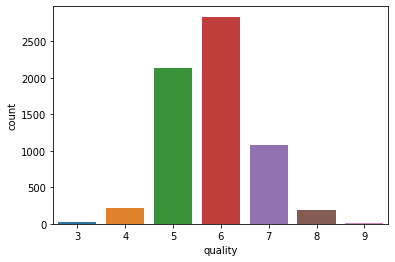

In [4]:
import seaborn as sns
sns.countplot(x='quality', data=given_data)

In [5]:
given_data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
quality = given_data.columns[len(given_data.columns)-1]
quality

'quality'

In [7]:
given_data = given_data.drop(given_data[given_data[quality] == 3].index)
given_data = given_data.drop(given_data[given_data[quality] == 4].index)
given_data = given_data.drop(given_data[given_data[quality] == 7].index)
given_data = given_data.drop(given_data[given_data[quality] == 8].index)
given_data = given_data.drop(given_data[given_data[quality] == 9].index)

<AxesSubplot:xlabel='quality', ylabel='count'>

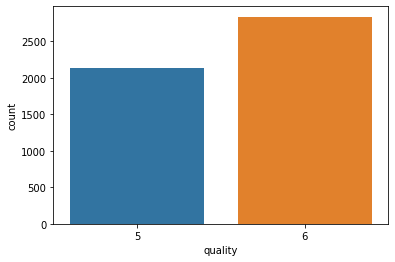

In [8]:
sns.countplot(x='quality', data=given_data)

# Основные характеристики данных

Основные числое характеристики:

In [9]:
given_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4965.000000,4968.000000,4971.000000,4973.000000,4973.000000,4974.000000,4974.000000,4974.000000,4967.000000,4971.000000,4974.000000,4974.000000
mean,7.243041,0.346423,0.316880,5.659924,0.058681,30.766285,117.744069,0.995113,3.215269,0.529865,10.265275,5.570165
std,1.280200,0.165673,0.150596,4.935363,0.036438,17.604133,57.861460,0.002867,0.159417,0.144597,1.070626,0.495102
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000,5.000000
25%,6.400000,0.230000,0.240000,1.800000,0.040000,17.000000,76.000000,0.992993,3.110000,0.440000,9.400000,5.000000
50%,7.000000,0.300000,0.310000,3.100000,0.049000,29.000000,121.000000,0.995400,3.200000,0.510000,10.000000,6.000000
75%,7.700000,0.420000,0.400000,8.500000,0.070000,42.000000,160.000000,0.997200,3.320000,0.600000,11.000000,6.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.980000,14.900000,6.000000


Таблица корреляции:

In [10]:
given_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.245779,0.288985,-0.147009,0.277968,-0.292979,-0.335543,0.425819,-0.227387,0.303852,-0.040127,-0.058514
volatile acidity,0.245779,1.000000,-0.382587,-0.218822,0.385146,-0.368782,-0.439717,0.293125,0.274866,0.266959,-0.049147,-0.227241
citric acid,0.288985,-0.382587,1.000000,0.159680,0.026121,0.154748,0.229476,0.087842,-0.339325,0.029711,-0.020798,0.052817
residual sugar,-0.147009,-0.218822,0.159680,1.000000,-0.165767,0.453919,0.504631,0.559895,-0.248945,-0.184880,-0.356440,-0.025374
chlorides,0.277968,0.385146,0.026121,-0.165767,1.000000,-0.198275,-0.293608,0.308413,0.056817,0.405628,-0.211621,-0.142649
free sulfur dioxide,-0.292979,-0.368782,0.154748,0.453919,-0.198275,1.000000,0.733103,0.060922,-0.174936,-0.220145,-0.219735,0.026089
total sulfur dioxide,-0.335543,-0.439717,0.229476,0.504631,-0.293608,0.733103,1.000000,0.026404,-0.259041,-0.268465,-0.267935,-0.046448
density,0.425819,0.293125,0.087842,0.559895,0.308413,0.060922,0.026404,1.000000,0.052646,0.273445,-0.641054,-0.222920
pH,-0.227387,0.274866,-0.339325,-0.248945,0.056817,-0.174936,-0.259041,0.052646,1.000000,0.188407,0.109301,0.017576
sulphates,0.303852,0.266959,0.029711,-0.184880,0.405628,-0.220145,-0.268465,0.273445,0.188407,1.000000,-0.015696,0.020719


с помощью `seaborn` библиотеки отобразим нагляднее корреляцию данных.

воспользуемся маской `np_triu()`, чтобы исключить повторяющиеся ячейки.

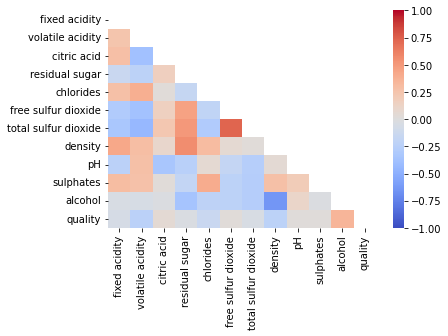

In [11]:
import seaborn as sb
mask = np.triu(given_data.corr())
sb.heatmap(given_data.corr(), mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
pass

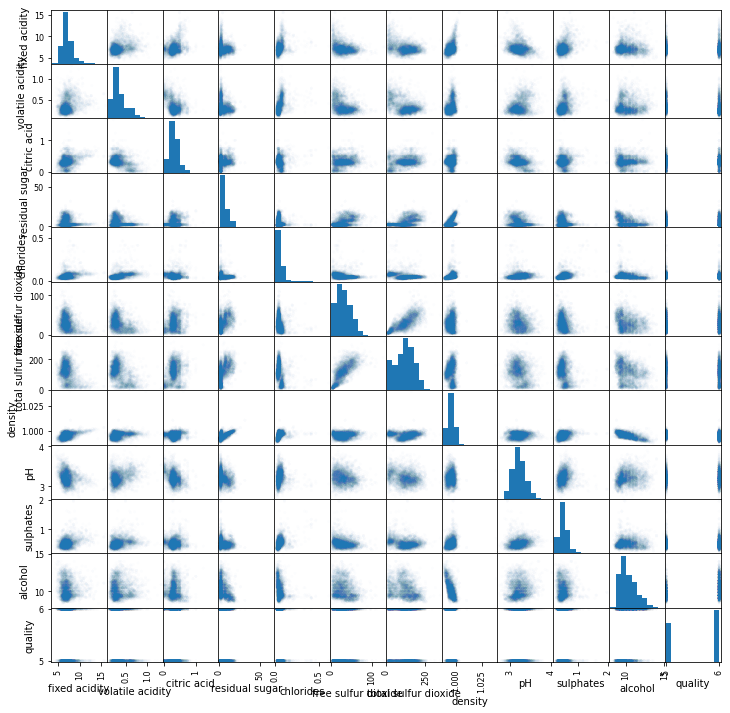

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(given_data, alpha = .01, figsize = (12, 12))
pass

# Есть пустые значения?

Вопрос: есть ли пустые значения?

In [13]:
given_data.dropna()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
print(given_data.shape)
print(given_data.dropna(axis = 0).shape)

(4974, 13)
(4948, 13)


Видим, что ~30 строк было выкинуто. Значит, пустые значения есть. Обработаем пустые значения.

# Обработка пустых значений

Найдем столбы для строковых данных `categorical_columns`, и численных `num_columns`

In [15]:
categorical_columns = [column for column in given_data.columns if given_data[column].dtype.name == 'object']
num_columns = [column for column in given_data.columns if given_data[column].dtype.name != 'object' and column != 'quality']

Теперь заполним пустые значения медианными (средними) значениями по каждому столбцу

In [16]:
median = given_data.median(axis = 0, numeric_only=True)

In [17]:
given_data = given_data.fillna(median, axis=0)

In [18]:
given_data[num_columns].count(axis = 0)

fixed acidity           4974
volatile acidity        4974
citric acid             4974
residual sugar          4974
chlorides               4974
free sulfur dioxide     4974
total sulfur dioxide    4974
density                 4974
pH                      4974
sulphates               4974
alcohol                 4974
dtype: int64

In [19]:
given_data[categorical_columns].count(axis = 0)

type    4974
dtype: int64

Теперь можно выделить выборки `X` - все данные кроме ключевого столбца, и `Y` - один ключевой столбец

In [20]:
given_data.dropna(axis=0)
Y = given_data['quality']
X = given_data.drop('quality', axis=1)

In [21]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
Y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 4974, dtype: int64

## Количество классов:

In [23]:
print(np.unique(Y))
print(len(np.unique(Y)))

[5 6]
2


# Векторизация

In [24]:
data_describe = X.describe(include = [object])
# for column in categorical_columns:
    # X[column] = X[column].fillna(data_describe[column]['top'])
data_describe

,type
count,4974
unique,2
top,white
freq,3655


In [25]:
binary_columns  = [column for column in categorical_columns if data_describe[column]['unique'] == 2]
non_binary_columns = [column for column in categorical_columns if data_describe[column]['unique'] > 2]
print(binary_columns, non_binary_columns)

['type'] []


In [26]:
X['type'].unique()

array(['white', 'red'], dtype=object)

In [27]:
X.at[X['type'] == 'white', 'type'] = 0
X.at[X['type'] == 'red', 'type'] = 1
X['type'].astype('float64').describe()

count    4974.000000
mean        0.265179
std         0.441473
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: type, dtype: float64

In [28]:
X['type']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 4974, dtype: object

# Нормализация

В целом, если смотреть, данные весьма разнородные, если достаточно низние значения, есть высокие, а больше всего и вовсе средних. В целях увеличиния точности, проведем нормализацию всех числовых ячеек.

In [29]:
num_data = X[num_columns].astype('float64')
num_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000
mean,7.242602,0.346367,0.316876,5.659409,0.058679,30.766285,117.744069,0.995113,3.215247,0.529853,10.265275
std,1.279083,0.165580,0.150550,4.935000,0.036434,17.604133,57.861460,0.002867,0.159306,0.144554,1.070626
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.040000,17.000000,76.000000,0.992993,3.110000,0.440000,9.400000
50%,7.000000,0.300000,0.310000,3.100000,0.049000,29.000000,121.000000,0.995400,3.200000,0.510000,10.000000
75%,7.700000,0.420000,0.400000,8.500000,0.070000,42.000000,160.000000,0.997200,3.310000,0.600000,11.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.980000,14.900000


In [30]:
num_data = (num_data - num_data.mean(axis = 0)) / num_data.std(axis = 0)

In [31]:
num_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.974000e+03,4.974000e+03,4.974000e+03,4974.000000,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03
mean,8.113958e-16,-1.371373e-16,-1.371373e-16,0.000000,1.371373e-16,6.856866e-17,9.142488e-17,-3.330151e-14,1.577079e-15,-2.742746e-16,-9.371050e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.691461e+00,-1.608687e+00,-2.104785e+00,-1.025210,-1.363535e+00,-1.690869e+00,-1.931235e+00,-2.753565e+00,-3.108787e+00,-2.074327e+00,-2.115841e+00
25%,-6.587544e-01,-7.027829e-01,-5.106320e-01,-0.782048,-5.126865e-01,-7.819916e-01,-7.214486e-01,-7.397883e-01,-6.606626e-01,-6.215874e-01,-8.081956e-01
50%,-1.896683e-01,-2.800277e-01,-4.567084e-02,-0.518624,-2.656660e-01,-1.003335e-01,5.627115e-02,1.000849e-01,-9.571089e-02,-1.373409e-01,-2.477759e-01
75%,3.575988e-01,4.446956e-01,5.521364e-01,0.575601,3.107153e-01,6.381294e-01,7.302949e-01,7.280275e-01,5.947856e-01,4.852618e-01,6.862568e-01
max,6.768442e+00,5.940514e+00,8.921438e+00,12.186544,1.515939e+01,5.693760e+00,3.910305e+00,1.530327e+01,4.988854e+00,1.003184e+01,4.328984e+00


# Соединние `num_data` и `X[binary_columns]`

In [32]:
X = pd.concat((num_data, X[binary_columns]), axis = 1)
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.974000e+03,4.974000e+03,4.974000e+03,4974.000000,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03,4.974000e+03
mean,8.113958e-16,-1.371373e-16,-1.371373e-16,0.000000,1.371373e-16,6.856866e-17,9.142488e-17,-3.330151e-14,1.577079e-15,-2.742746e-16,-9.371050e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.691461e+00,-1.608687e+00,-2.104785e+00,-1.025210,-1.363535e+00,-1.690869e+00,-1.931235e+00,-2.753565e+00,-3.108787e+00,-2.074327e+00,-2.115841e+00
25%,-6.587544e-01,-7.027829e-01,-5.106320e-01,-0.782048,-5.126865e-01,-7.819916e-01,-7.214486e-01,-7.397883e-01,-6.606626e-01,-6.215874e-01,-8.081956e-01
50%,-1.896683e-01,-2.800277e-01,-4.567084e-02,-0.518624,-2.656660e-01,-1.003335e-01,5.627115e-02,1.000849e-01,-9.571089e-02,-1.373409e-01,-2.477759e-01
75%,3.575988e-01,4.446956e-01,5.521364e-01,0.575601,3.107153e-01,6.381294e-01,7.302949e-01,7.280275e-01,5.947856e-01,4.852618e-01,6.862568e-01
max,6.768442e+00,5.940514e+00,8.921438e+00,12.186544,1.515939e+01,5.693760e+00,3.910305e+00,1.530327e+01,4.988854e+00,1.003184e+01,4.328984e+00


In [33]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-0.189668,-0.461209,0.286444,3.047739,-0.375453,0.808544,0.903122,2.053684,-1.351159,-0.552409,-1.368615,0
1,-0.736935,-0.280028,0.153598,-0.822575,-0.265666,-0.952406,0.246380,-0.388315,0.532013,-0.275697,-0.714792,0
2,0.670323,-0.400815,0.552136,0.251386,-0.238219,-0.043529,-0.358513,-0.004572,0.280924,-0.621587,-0.154373,0
3,-0.033306,-0.702783,0.020752,0.575601,-0.018645,0.922154,1.179644,0.169856,-0.158483,-0.898300,-0.341179,0
4,-0.033306,-0.702783,0.020752,0.575601,-0.018645,0.922154,1.179644,0.169856,-0.158483,-0.898300,-0.341179,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.815116,1.531781,-1.573400,-0.741522,0.859650,0.070081,-1.274494,-0.074344,1.473599,0.346906,0.219240,1
6493,-1.049659,1.229812,-1.440554,-0.700995,0.091141,0.467715,-1.153515,0.002405,1.913006,-0.137341,0.873063,1
6494,-0.736935,0.988238,-1.241285,-0.680731,0.475396,-0.100334,-1.343624,0.218696,1.285282,1.522933,0.686257,1
6495,-1.049659,1.803552,-1.307708,-0.741522,0.447949,0.070081,-1.274494,0.124505,2.226868,1.246221,-0.060969,1


In [34]:
print(X.shape)

(4974, 12)


# Обучение выборки

In [35]:
features = X.columns
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

In [36]:
type(features)

pandas.core.indexes.base.Index

In [37]:
X = X.to_numpy()

In [38]:
Y = Y.to_numpy(dtype='int32')

In [39]:
print(X.shape)
print(Y.shape)
N, d = X.shape

(4974, 12)
(4974,)


In [40]:
type(X)

numpy.ndarray

In [41]:
type(Y)

numpy.ndarray

In [42]:
np.unique(Y)

array([5, 6])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3481 1493


# kNN метод. Результаты.

Добавим 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

COUNT_NEIGHBOURS = 10

t = time()
knn = KNeighborsClassifier(n_neighbors = COUNT_NEIGHBOURS)
knn.fit(X_train, y_train)
knn_time = time() - t
knn_time

0.009002447128295898

In [45]:
y_test_predict = knn.predict(X_test)
error_test = np.mean(y_test  != y_test_predict)

Ошибка при реальном (тестировании) использовании классификации:

In [46]:
error_test

0.29872739450770264

In [47]:
y_train_predict = knn.predict(X_train)
error_train  = np.mean(y_train  != y_train_predict)

Ошибка при тренировке:

In [48]:
error_train

0.23556449296179258

Разница:

In [49]:
error_test - error_train

0.06316290154591006

## Меняем число соседей

In [50]:
COUNT_NEIGHBOURS = 5

knn.set_params(n_neighbors=COUNT_NEIGHBOURS)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
error_test = np.mean(y_test  != y_test_predict)

print(error_test, error_train, error_test - error_train)

0.2913596784996651 0.23556449296179258 0.05579518553787252


In [51]:
COUNT_NEIGHBOURS = 2

knn.set_params(n_neighbors=COUNT_NEIGHBOURS)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
error_test = np.mean(y_test  != y_test_predict)

print(error_test, error_train, error_test - error_train)

0.29872739450770264 0.23556449296179258 0.06316290154591006


In [52]:
COUNT_NEIGHBOURS = 100

knn.set_params(n_neighbors=COUNT_NEIGHBOURS)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
error_test = np.mean(y_test  != y_test_predict)

print(error_test, error_train, error_test - error_train)

0.3201607501674481 0.23556449296179258 0.08459625720565553


In [53]:
COUNT_NEIGHBOURS = 1000

knn.set_params(n_neighbors=COUNT_NEIGHBOURS)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
error_test = np.mean(y_test  != y_test_predict)

print(error_test, error_train, error_test - error_train)

0.37307434695244474 0.23556449296179258 0.13750985399065216


## Интерпретация результатов тренировки

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
print(confusion_matrix(y_train, y_train_predict))

[[1086  382]
 [ 438 1575]]


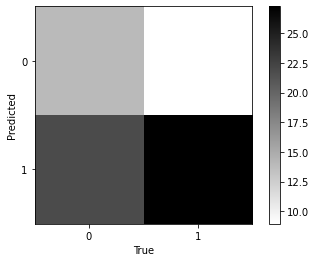

In [56]:
M = confusion_matrix(y_test_predict, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("True")
plt.ylabel("Predicted")
plt.colorbar()
pass

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict, zero_division=0))

              precision    recall  f1-score   support

           5       0.71      0.74      0.73      1468
           6       0.80      0.78      0.79      2013

    accuracy                           0.76      3481
   macro avg       0.76      0.76      0.76      3481
weighted avg       0.77      0.76      0.76      3481



# Другие методы машинного обучения и результаты

Рассмотрим еще два метода машинного обучения. 

Первым будет SVC, который хорошо (по документации) подходит для более или менее большого количества признаков (но количество признаков < количества строк). 

А вторым GBT, как пример машинного обучения, который, разумеется, должен быть точнее, т.к. он сложнее и "запутаннее", а значит и намного более медленным.

## SVC

In [58]:
from sklearn.svm import SVC

t = time()
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc_time = time() - t

error_train = np.mean(y_train != svc.predict(X_train))
error_test  = np.mean(y_test  != svc.predict(X_test))

print(error_train, error_test, error_test - error_train)

0.2539500143636886 0.2793034159410583 0.025353401577369705


## GBT

In [59]:
from sklearn import ensemble

t = time()
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)
gbt_time = time() - t

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test, error_test - error_train)

0.037345590347601265 0.23710649698593436 0.025353401577369705


# Время выполнения

In [60]:
print(knn_time, svc_time, gbt_time)

0.009002447128295898 0.2795865535736084 4.613878965377808


**Общий вывод**: kNN метод оказался самым ошибочными, но и одним из самых быстрых. а gbt - самым точным, но медленным по выполнению. Наиболее выгодно использовать svc, т.к. он точнее knn, но работает "допустимое" время.

In [61]:
print(svc_time / knn_time, gbt_time / knn_time)

31.056728197250987 512.5138642442861


# Общий вывод и заключение

Данные не идеальные и данных достаточно мало (<10000), но зато датасет имеет разнообразные признаки и множество классов, и в целом с ним удалось провести все необходимые преобразования, отображения и проверки. Точность предсказания здесь "уперлась в потолок", т.к. уже зависит только от количества данных. Еще стоит заметить, что классификация идет не на 2, а сразу на 7 классов. В купе с количеством данных это дает высокую ошибку. 

Датасет еще хорош тем, что все признаки разнообразно коррелируют друг с другом (что видно по таблице и графику корреляции), и задача не становится такой простой, какой могла быть.

Заметка: если увеличивать количество данных в данном датасете, то резонно использовать только быстрые классификаторы.

Заметка: если не увеличивать количество данных в данном датасете, то резонно использовать gbt классификатор, т.к. он дает ошибку наименьшую, а в тренировочной выборке и вовсе 10%.

# Спасибо за внимание!